In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

c0 = 10

def dcdt(t, c, k3 = 0.01):
    return -k3*(c**3)

def c_analytical(c0, t, k3 = 0.01):
    return (2*k3*t+np.ones_like(t)*c0**-2)**-0.5




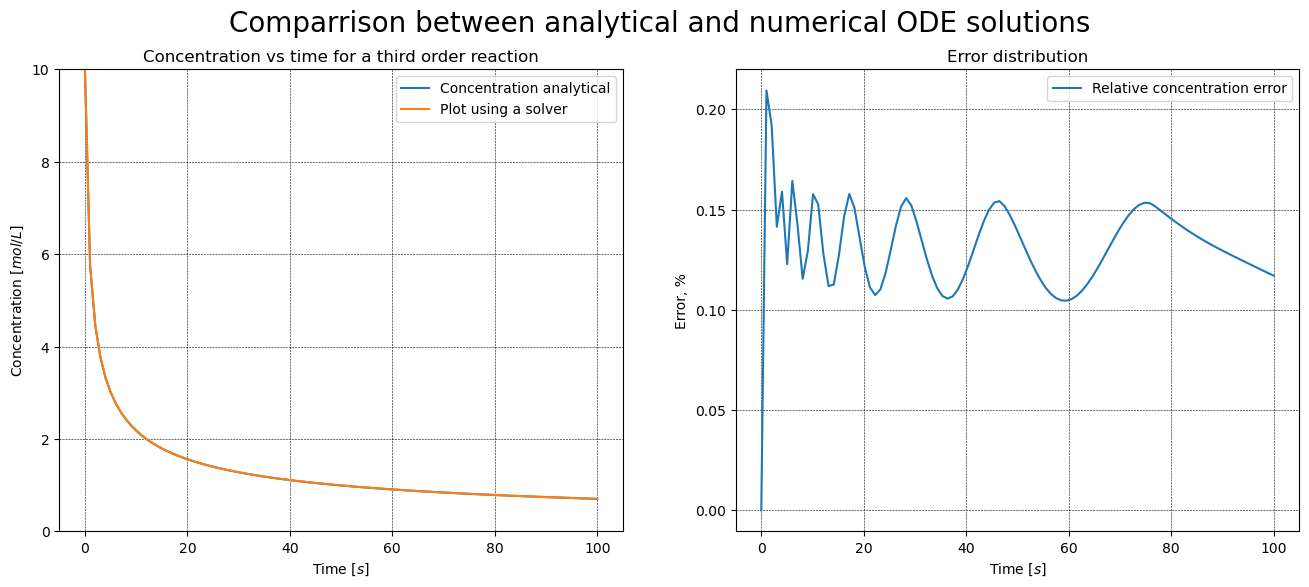

In [3]:
times = np.linspace(0,100, 100)
result = solve_ivp(dcdt, (0,100), [c0], t_eval=times)

fig, axes = plt.subplots(ncols=2, figsize = (16,6))
fig.suptitle('Comparrison between analytical and numerical ODE solutions', size = 20)
axes[0].plot(result.t, c_analytical(c0, result.t), label = 'Concentration analytical')
axes[0].plot(result.t, result.y[0], label = 'Plot using a solver')
axes[0].grid(linestyle = '--', color = 'black', linewidth = 0.4)
axes[0].legend()
axes[0].set_ylim(0,10)
axes[0].set_xlabel('Time [$s$]')
axes[0].set_ylabel('Concentration [$mol/L$]')
axes[0].set_title('Concentration vs time for a third order reaction')

axes[1].plot(result.t, (result.y[0]- c_analytical(c0, result.t))/c_analytical(c0, result.t)*100, label = 'Relative concentration error')
axes[1].grid(linestyle = '--', color = 'black', linewidth = 0.4)
axes[1].legend()
axes[1].set_xlabel('Time [$s$]')
axes[1].set_ylabel('Error, %')
axes[1].set_title('Error distribution')
plt.show()


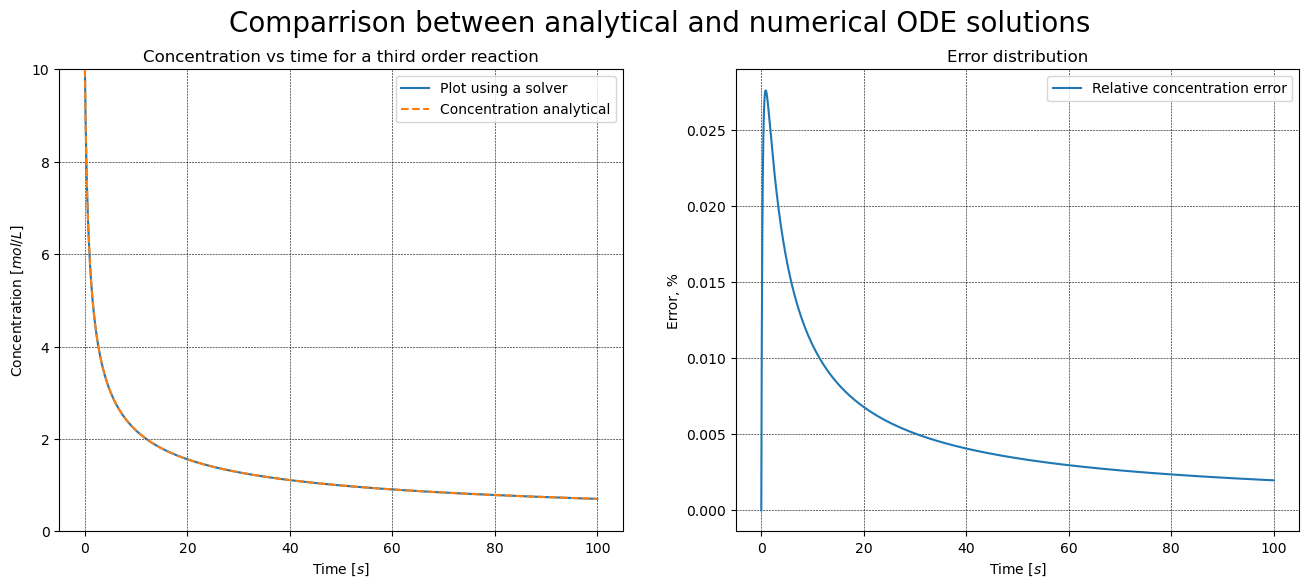

In [19]:
def implicit_euler_function(func, t_span, y0):
    n = int((t_span[1]-t_span[0])*1000)
    t = np.linspace(t_span[0], t_span[1], n+1)
    dt = 1e-3
    dy = 1e-9
    y = np.zeros(n+1)
    y[0] = y0
    for i in range(n):
        dfdy = (func(t[i], y[i] + dy)-func(t[i], y[i]))/dy
        y[i+1] = y[i]+dt*func(t[i], y[i])/(1-dt*dfdy)
    return t, y

times = np.linspace(0,100, 100)
result = implicit_euler_function(dcdt, (0,100), c0)
fig, ax = plt.subplots(ncols=2, figsize = (16,6))

fig.suptitle('Comparrison between analytical and numerical ODE solutions', size = 20)

ax[0].plot(result[0], result[1], label = 'Plot using a solver')
ax[0].plot(result[0], c_analytical(c0, result[0]), label = 'Concentration analytical', linestyle = '--')

ax[0].grid(linestyle = '--', color = 'black', linewidth = 0.4)
ax[0].legend()
ax[0].set_ylim(0,10)
ax[0].set_xlabel('Time [$s$]')
ax[0].set_ylabel('Concentration [$mol/L$]')
ax[0].set_title('Concentration vs time for a third order reaction')

ax[1].plot(result[0], (result[1]- c_analytical(c0, result[0]))/c_analytical(c0, result[0])*100, label = 'Relative concentration error')
ax[1].grid(linestyle = '--', color = 'black', linewidth = 0.4)
ax[1].legend()
ax[1].set_xlabel('Time [$s$]')
ax[1].set_ylabel('Error, %')
ax[1].set_title('Error distribution')
plt.show()
